In [55]:
# import stuff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [56]:
df_train = pd.read_csv("data/train.csv")
df_train.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [57]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Sale price

Lets look at how the main variable looks!


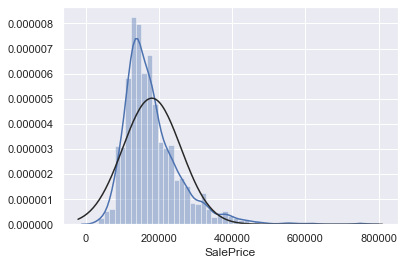

In [58]:
sns.distplot(df_train["SalePrice"], fit=norm)

In [59]:
print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

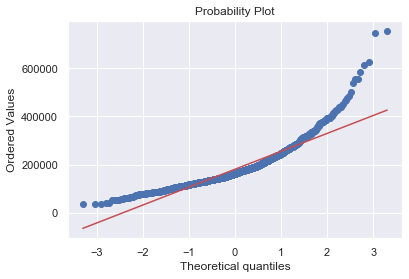

In [60]:
# Probability plot
stats.probplot(df_train["SalePrice"], plot=plt)

It might help to log transform SalePrice

**Relationship with other variables**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


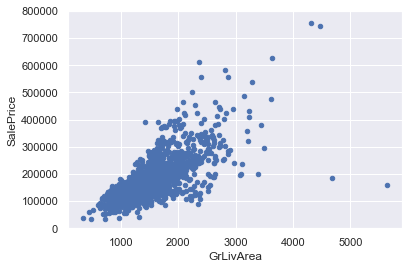

In [61]:
df_train.plot.scatter(x="GrLivArea",y="SalePrice",ylim=(0,800000))
#sns.lmplot(x="GrLivArea",y="SalePrice",data=df_train,fit_reg=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


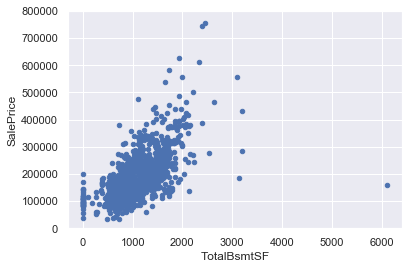

In [62]:
df_train.plot.scatter(x="TotalBsmtSF",y="SalePrice",ylim=(0,800000))


**Relationship with categorical variables**

(-0.5, 9.5, 0, 800000)

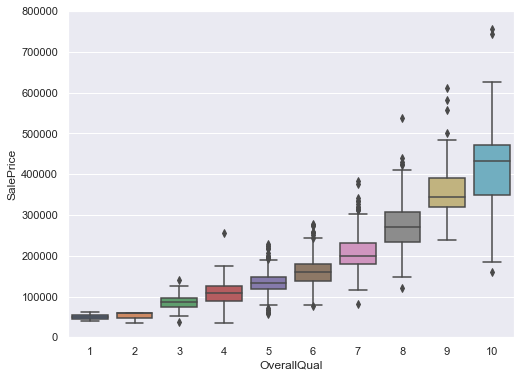

In [63]:
# OVerall QUality of the house
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x="OverallQual",y="SalePrice",data=df_train)
fig.axis(ymin=0,ymax=800000)

(-0.5, 111.5, 0, 800000)

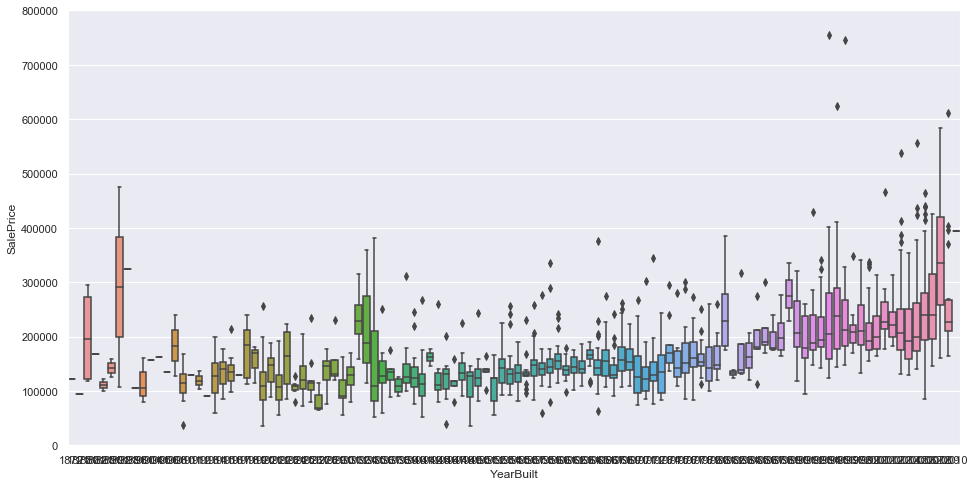

In [64]:
# Year built
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x="YearBuilt",y="SalePrice",data=df_train)
fig.axis(ymin=0,ymax=800000)

## Correlation matrix and Heatmaps

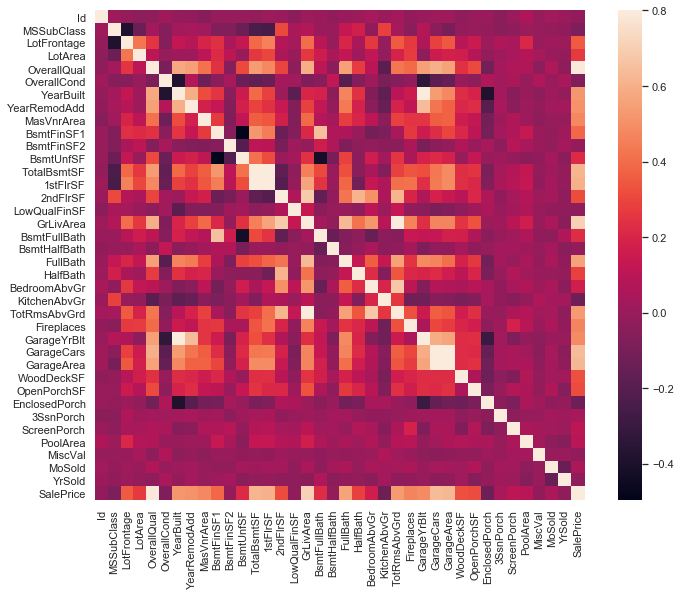

In [65]:
# Universal correlation
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)

In [66]:
# Top 10 correlated variables with SalePrice
cols = corrmat.nlargest(10,"SalePrice")["SalePrice"].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

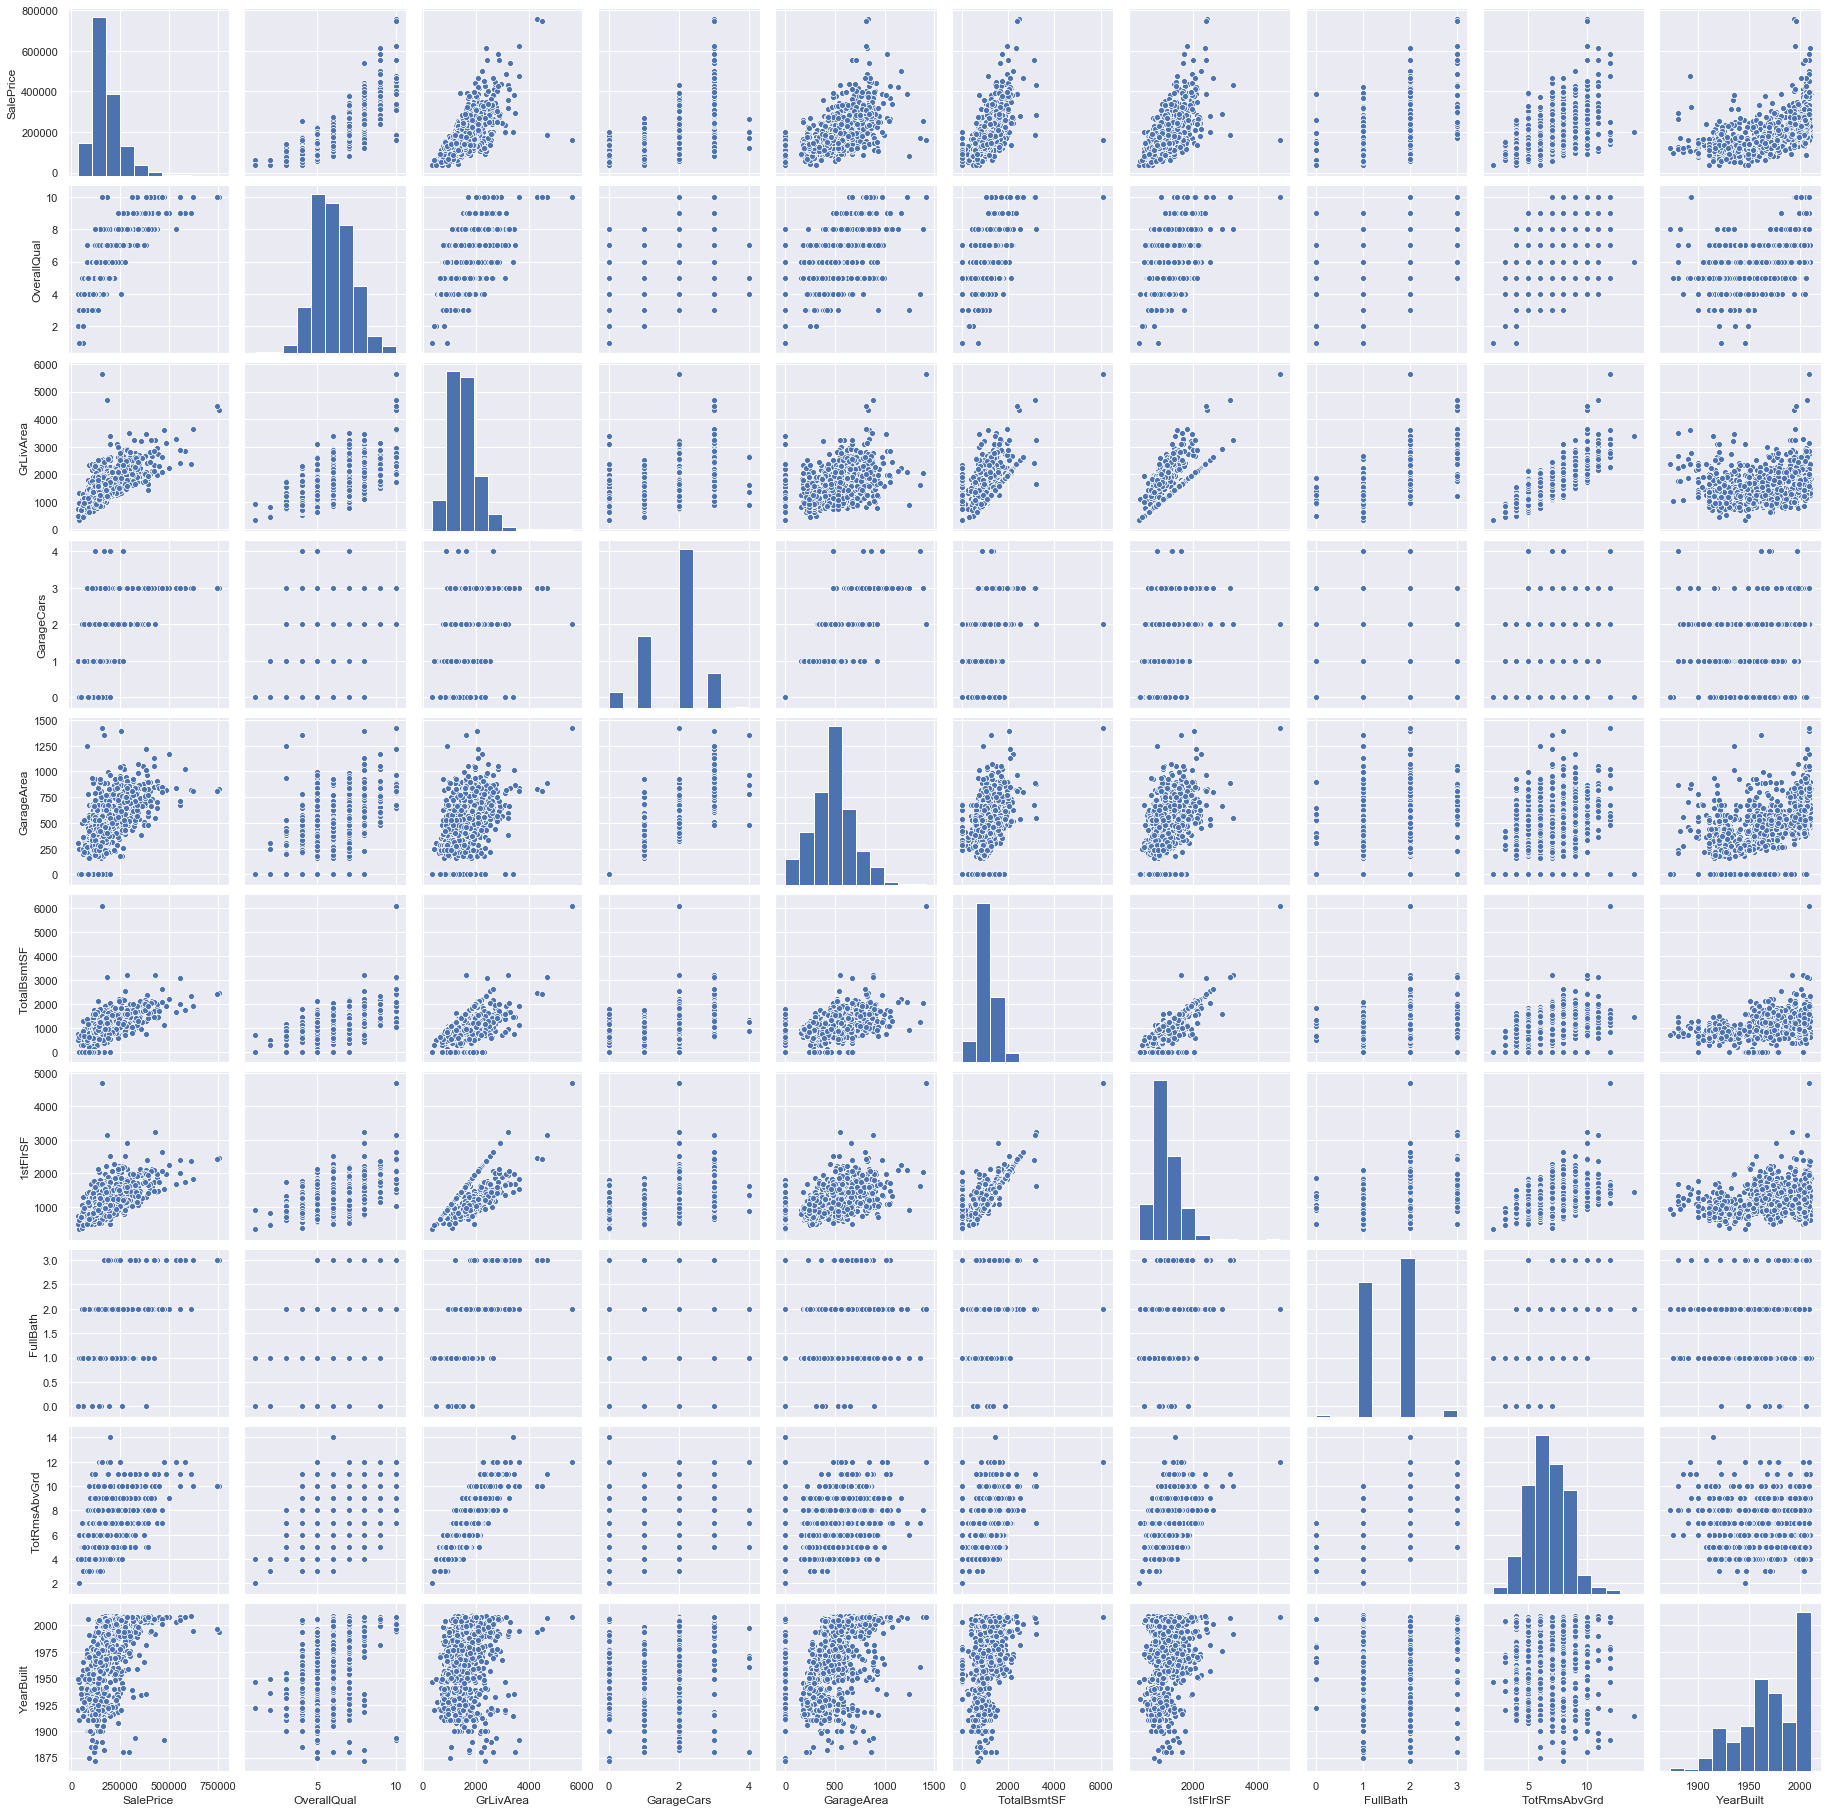

In [67]:
# Relationship overload
sns.set()
sns.pairplot(df_train[cols], size=2.5)

# Missing Data

In [68]:
mis = df_train.isnull().sum().sort_values(ascending=False)
mis_pct = (df_train.isnull().sum())/(df_train.isnull().count()).sort_values(ascending=False)
mis = pd.concat([mis,mis_pct], axis=1,keys=["Total","Percent"])
mis.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
